## Data set ##
 https://www.kaggle.com/therohk/million-headlines/data


In [ ]:
import pandas as pd

data = pd.read_csv('abcnews-date-text.csv', error_bad_lines=False);
data_text['index'] = data_text.index
documents = data_text

In [ ]:
data

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1226253,20201231,what abc readers learned from 2020 looking bac...
1226254,20201231,what are the south african and uk variants of ...
1226255,20201231,what victorias coronavirus restrictions mean f...
1226256,20201231,whats life like as an american doctor during c...


In [ ]:
len(documents)

1226258

In [ ]:
documents[:10]

,headline_text,index
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,3
4,air nz strike to affect australian travellers,4
5,ambitious olsson wins triple jump,5
6,antic delighted with record breaking barca,6
7,aussie qualifier stosur wastes four memphis match,7
8,aust addresses un security council over iraq,8
9,australia is locked into war timetable opp,9


### Data Preprocessing

In [ ]:
import gensim                                           
from gensim.utils import simple_preprocess              
from gensim.parsing.preprocessing import STOPWORDS      
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [ ]:
import nltk
nltk.download('wordnet') 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
stemmer = SnowballStemmer('english')

In [ ]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
processed_docs = documents['headline_text'].map(preprocess)

In [ ]:
type(processed_docs)

pandas.core.series.Series

In [ ]:
processed_docs[:10]

0            [decid, communiti, broadcast, licenc]
1                               [wit, awar, defam]
2           [call, infrastructur, protect, summit]
3                      [staff, aust, strike, rise]
4             [strike, affect, australian, travel]
5               [ambiti, olsson, win, tripl, jump]
6           [antic, delight, record, break, barca]
7    [aussi, qualifi, stosur, wast, memphi, match]
8            [aust, address, secur, council, iraq]
9                         [australia, lock, timet]
Name: headline_text, dtype: object

### Bag of words on the dataset

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [ ]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 broadcast
1 communiti
2 decid
3 licenc
4 awar
5 defam
6 wit
7 call
8 infrastructur
9 protect
10 summit


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(162, 1), (240, 1), (292, 1), (589, 1), (838, 1), (3570, 1), (3571, 1)]

In [ ]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 162 ("govt") appears 1 time.
Word 240 ("group") appears 1 time.
Word 292 ("vote") appears 1 time.
Word 589 ("local") appears 1 time.
Word 838 ("want") appears 1 time.
Word 3570 ("compulsori") appears 1 time.
Word 3571 ("ratepay") appears 1 time.


### TF-IDF

In [ ]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [ ]:
corpus_tfidf = tfidf[bow_corpus]


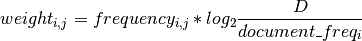

In [ ]:
print(corpus_tfidf[4310])

[(162, 0.25770113995459504), (240, 0.30204199018649414), (292, 0.3336399472840192), (589, 0.33279180081411774), (838, 0.31228519168232133), (3570, 0.5147459880571542), (3571, 0.5077492376680615)]


### Running LDA using TF-IDF

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [ ]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.011*"interview" + 0.009*"weather" + 0.008*"climat" + 0.008*"friday" + 0.008*"coronavirus" + 0.007*"sport" + 0.007*"david" + 0.007*"mental" + 0.006*"scott" + 0.006*"korea"
Topic: 1 Word: 0.017*"charg" + 0.016*"polic" + 0.014*"murder" + 0.010*"court" + 0.010*"woman" + 0.010*"alleg" + 0.008*"jail" + 0.008*"death" + 0.008*"sentenc" + 0.008*"arrest"
Topic: 2 Word: 0.007*"hill" + 0.005*"mount" + 0.005*"human" + 0.004*"malcolm" + 0.004*"lake" + 0.004*"australia" + 0.004*"firefight" + 0.004*"cultur" + 0.004*"shorten" + 0.004*"capit"
Topic: 3 Word: 0.011*"royal" + 0.008*"commiss" + 0.008*"christma" + 0.008*"michael" + 0.007*"rain" + 0.007*"drought" + 0.006*"queensland" + 0.005*"western" + 0.005*"energi" + 0.005*"farmer"
Topic: 4 Word: 0.012*"coronavirus" + 0.008*"care" + 0.008*"monday" + 0.008*"border" + 0.007*"violenc" + 0.006*"turnbul" + 0.006*"coast" + 0.006*"age" + 0.006*"bushfir" + 0.006*"peter"
Topic: 5 Word: 0.024*"trump" + 0.008*"final" + 0.006*"kill" + 0.006*"alan" + 0

### Classification of the topics

### classifying sample document using LDA TF-IDF model

In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8874765038490295	 
Topic: 0.015*"drum" + 0.009*"andrew" + 0.008*"financ" + 0.008*"sexual" + 0.006*"grandstand" + 0.006*"jam" + 0.006*"octob" + 0.005*"quiz" + 0.005*"blog" + 0.005*"great"

Score: 0.012506742030382156	 
Topic: 0.009*"govern" + 0.009*"restrict" + 0.007*"stori" + 0.007*"elect" + 0.007*"liber" + 0.006*"coronavirus" + 0.005*"explain" + 0.005*"social" + 0.005*"water" + 0.005*"job"

Score: 0.012503411620855331	 
Topic: 0.013*"countri" + 0.010*"hour" + 0.008*"morrison" + 0.007*"road" + 0.007*"thursday" + 0.006*"coronavirus" + 0.005*"quarantin" + 0.005*"brief" + 0.005*"truck" + 0.005*"crash"

Score: 0.012502702884376049	 
Topic: 0.018*"news" + 0.016*"market" + 0.011*"donald" + 0.010*"rural" + 0.009*"australia" + 0.009*"coronavirus" + 0.007*"tuesday" + 0.007*"australian" + 0.007*"wednesday" + 0.007*"covid"

Score: 0.01250247098505497	 
Topic: 0.017*"charg" + 0.016*"polic" + 0.014*"murder" + 0.010*"court" + 0.010*"woman" + 0.010*"alleg" + 0.008*"jail" + 0.008*"death" + 0

### Testing model on unseen document

In [ ]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

Score: 0.3713971674442291	 Topic: 0.011*"interview" + 0.009*"weather" + 0.008*"climat" + 0.008*"friday" + 0.008*"coronavirus"
Score: 0.25653576850891113	 Topic: 0.015*"drum" + 0.009*"andrew" + 0.008*"financ" + 0.008*"sexual" + 0.006*"grandstand"
Score: 0.2553846538066864	 Topic: 0.011*"royal" + 0.008*"commiss" + 0.008*"christma" + 0.008*"michael" + 0.007*"rain"
Score: 0.016670729964971542	 Topic: 0.018*"news" + 0.016*"market" + 0.011*"donald" + 0.010*"rural" + 0.009*"australia"
Score: 0.016670072451233864	 Topic: 0.012*"coronavirus" + 0.008*"care" + 0.008*"monday" + 0.008*"border" + 0.007*"violenc"
Score: 0.016669990494847298	 Topic: 0.009*"govern" + 0.009*"restrict" + 0.007*"stori" + 0.007*"elect" + 0.007*"liber"
Score: 0.016668496653437614	 Topic: 0.013*"countri" + 0.010*"hour" + 0.008*"morrison" + 0.007*"road" + 0.007*"thursday"
Score: 0.01666819490492344	 Topic: 0.024*"trump" + 0.008*"final" + 0.006*"kill" + 0.006*"alan" + 0.005*"june"
Score: 0.016668003052473068	 Topic: 0.007*"hil

### **References**
https://radimrehurek.com/gensim/models/ldamulticore.html

https://radimrehurek.com/gensim/models/tfidfmodel.html

https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24


